# San Francisco Crime Stats (Preliminary Analysis)
#### Data Visualization Class (Third in series on Data at Scale)
## Summer of 2014
### Top Crime Categories by: 
#### 1. Day of Week
#### 2. Police District
#### 3. Resolution status


In [2]:
# Load in R libraries

library(chron)
library(stringr)
library(lubridate)
library(lattice)
library(ggplot2)
library(ggthemes)
library(plyr)
library(e1071)

# Set a few options for printing and suppressing warnings for this assignment
options(jupyter.plot_mimetypes = 'image/png')
options(warn=-1)

In [3]:
# Read in data files

sf_file_name <- "data/sanfrancisco_incidents_summer_2014.csv"

# Seattle data for later analysis
se_file_name <- "data/seattle_incidents_summer_2014.csv"

sf_data <- read.csv(sf_file_name, header = TRUE)
se_data <- read.csv(se_file_name, header = TRUE)


In [4]:
cat("Basic structure of San Francisco Data.\n\n")
str(sf_data)


Basic structure of San Francisco Data.

'data.frame':	28993 obs. of  13 variables:
 $ IncidntNum: int  140734311 140736317 146177923 146177531 140734220 140734349 140734349 140734349 140738147 140734258 ...
 $ Category  : Factor w/ 34 levels "ARSON","ASSAULT",..: 1 20 16 16 20 7 7 6 21 30 ...
 $ Descript  : Factor w/ 368 levels "ABANDONMENT OF CHILD",..: 15 179 143 143 132 247 239 93 107 347 ...
 $ DayOfWeek : Factor w/ 7 levels "Friday","Monday",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Date      : Factor w/ 92 levels "06/01/2014","06/02/2014",..: 92 92 92 92 92 92 92 92 92 92 ...
 $ Time      : Factor w/ 1379 levels "00:01","00:02",..: 1370 1365 1351 1351 1344 1334 1334 1334 1321 1321 ...
 $ PdDistrict: Factor w/ 10 levels "BAYVIEW","CENTRAL",..: 1 4 8 7 7 8 8 8 3 2 ...
 $ Resolution: Factor w/ 16 levels "ARREST, BOOKED",..: 12 12 12 12 12 1 1 1 12 2 ...
 $ Address   : Factor w/ 8055 levels "0 Block of 10TH ST",..: 6843 4022 1098 6111 5096 1263 1263 1263 1575 5236 ...
 $ X         : num  -122 -

In [5]:
# Create some variables for ease of use

temp_time <- str_replace_all(paste(sf_data$Time, ":00"), fixed(" "), "")
temp_date_time <- paste(sf_data$Date, temp_time, sep = " ")

sf_data$Posix_Date <- as.Date(temp_date_time, format = "%m/%d/%Y %H:%M:%S")

# Reorder DayOfWeek factors
sf_data$DayOfWeek <- factor(sf_data$DayOfWeek, levels = c("Monday", "Tuesday", "Wednesday", 
                                                          "Thursday", "Friday", "Saturday", "Sunday"))

# Create temporary dataframes to use in producing graphs
CatByDay <- count(sf_data, cbind("Category", "DayOfWeek"))
CatByPdDistrict <- count(sf_data, cbind("Category", "PdDistrict"))
CatByResolution <- count(sf_data, cbind("Category", "Resolution"))
CatByDate <- count(sf_data, cbind("Category", "Date"))



## Graph 1: Visualization of data showing top crime categories by Day of Week

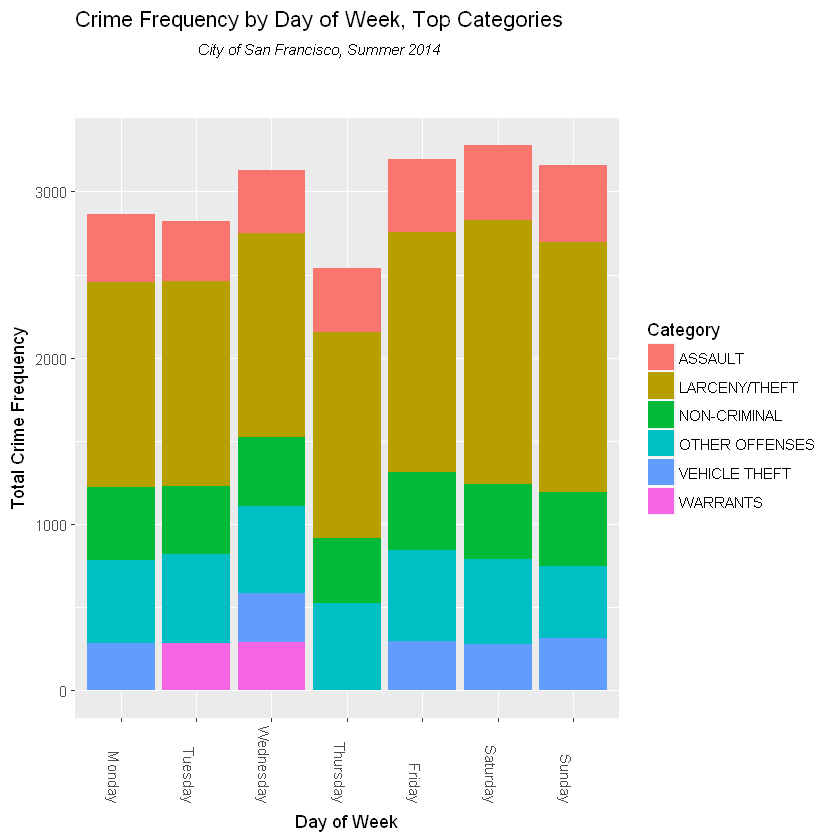

In [6]:

ggplot(data=CatByDay[ order(-CatByDay[,3]), ][1:35,], 
       aes(x=DayOfWeek, y=freq, fill=Category)) + 
    theme(axis.text.x=element_text(angle=-90,hjust=1)) +
    geom_bar(stat='identity') +
    labs(x="Day of Week", y="Total Crime Frequency") +
    ggtitle(expression(atop("Crime Frequency by Day of Week, Top Categories", 
                            atop(italic("City of San Francisco, Summer 2014"), "")))) 



Initial findings from **Graph 1** above indicate that the top crime categories are spread across the days of the week fairly evenly with **_Warrants_** and **_Vehicle Theft_** being the exception.  With **_Warrants_** it is possible that they are only servied on Tuesday and Wednesday weekdays.  No Vehicle thefts on Wednesday is most likely a statistical fluke. Several other findings stand out. To-wit:
- **_Larceny/Theft_** is consistently the most common crime
- Other named offenses (**_Vehicle Theft_**, **_Assault_**, **_Non-Criminal_**) appear equally proportioned
- **_Other Offenses_** is (marginally) the second largest category but since this is a catch-all category this may not be surprising



## Graph 2: Visualization of data showing top crime categories by Police Dept. District

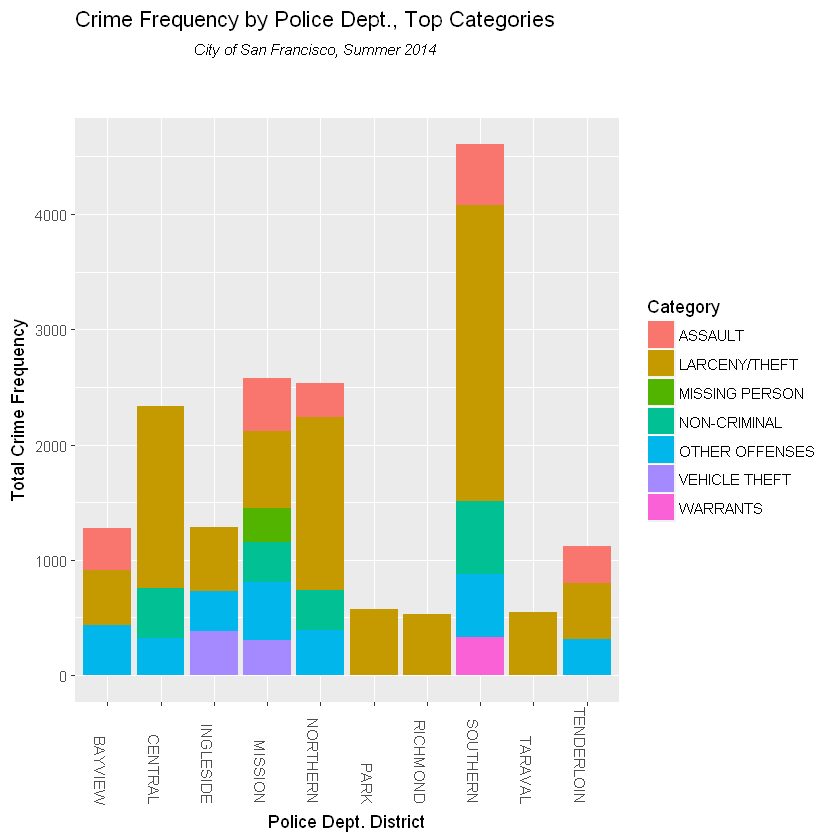

In [7]:
ggplot(data=CatByPdDistrict[ order(-CatByPdDistrict[,3]), ][1:30,], 
       aes(x=PdDistrict, y=freq, fill=Category)) +
    theme(axis.text.x=element_text(angle=-90,hjust=1)) +
    geom_bar(stat='identity') +
    labs(x="Police Dept. District", y="Total Crime Frequency") +
    ggtitle(expression(atop("Crime Frequency by Police Dept., Top Categories", 
                            atop(italic("City of San Francisco, Summer 2014"), "")))) 

In **Graph 2** the findings are organized by District and not by Day of Week.  The results indicate that, during the summer at least, several districts and crime categories stand out in terms of overall crime.  In particular:
- **_Southern District_** experienced between 1.8 and 9 times the crime as other police department districts in San Francisco. Specifically **_Southern District_** experienced approximately 1.8 times as much crime across the top categories as the **_Central_**, **_Mission_**, and **_Northern districts_** (> 5000 reported crimes vs. ~ 2500 reported crimes). The other districts had even less reported crime than that with **_Park_**, **_Richmond_**, and **_Traval_** districts only indicating approximately 500 reported crimes during the same period.
- As with Graph 1, **_Larceny/Theft_** was the most common reported crime category across all districts
- Some districts did not report any **_Assault_** Category crimes (**_Central_**, **_Ingleside_**, **_Park_**, **_Richmond_**, and **_Taraval_**)
- Three districts reported only **_Larceny/Theft_** crimes and no crimes in other categories (**_Park_**, **_Richmond_**, and **_Taraval_**)



## Graph 3: Visualization of data showing top Crime Categories by Resolution Status

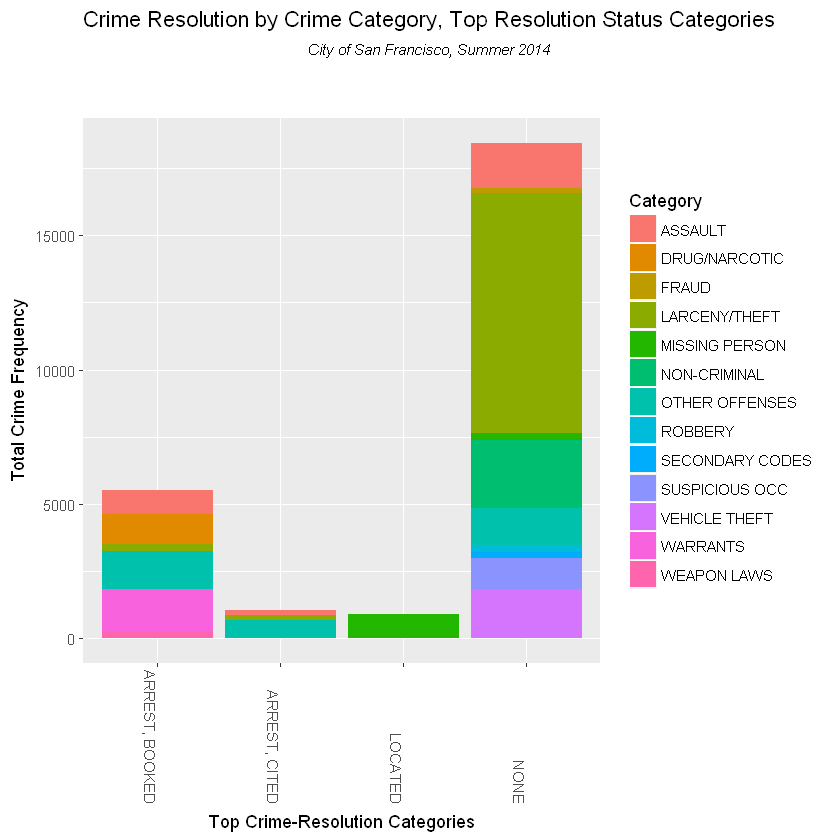

In [8]:
ggplot(data=CatByResolution[ order(-CatByResolution[,3], CatByResolution[,1]), ][1:20,], 
       aes(x=Resolution, y=freq, fill=Category)) +
    theme(axis.text.x=element_text(angle=-90,hjust=1)) +
    geom_bar(stat='identity') +
    labs(x="Top Crime-Resolution Categories", y="Total Crime Frequency") +
    ggtitle(expression(atop("Crime Resolution by Crime Category, Top Resolution Status Categories", 
                            atop(italic("City of San Francisco, Summer 2014"), "")))) 


The very surprising take-away from **Graph 3** is that across the top four **_Resolution_** Categories, the category with the highest frequency is **_None_** ! Over 17000 of the almost 29000 incidents reported (across all Crime Categories) resulted in no resolution in the summer months of 2014.  Approximately 25% of reported incidents (~7000) resulted in some kind of arrest. The obvious caveat to this finding is that since the data only include June, July, and August of 2014 many of these crimes may have been resolved later. Further data would throw light on the preliminary findings. 